In [123]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import datetime

In [124]:
# load dataset

mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)



Date
2009-10-05    149
2009-10-12    174
2009-10-19    239
2009-10-26    295
2009-11-02    298
Name: Influenza Deaths, dtype: int64
Date
2017-11-13     43
2017-11-20     45
2017-11-27     65
2017-12-04     83
2017-12-11    106
Name: Influenza Deaths, dtype: int64


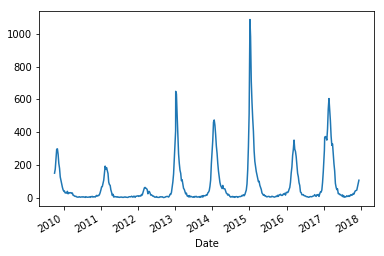

In [125]:
# summarize first few rows
print(mydata.head())
print(mydata.tail())
# line plot
mydata.plot()
pyplot.show()

In [126]:
# split data into train and test
X = mydata.values
train, test = X[0:-50], X[-50:]

In [127]:
train

array([ 149,  174,  239,  295,  298,  265,  208,  179,  126,  105,   84,
         63,   47,   37,   39,   28,   29,   27,   38,   23,   30,   28,
         30,   29,   25,   28,   14,   13,    9,    7,    8,    4,    3,
          2,    4,    5,    2,    3,    4,    3,    5,    3,    3,    1,
          5,    3,    2,    2,    3,    4,    1,    6,    5,    7,    3,
          5,    5,    3,    9,   13,    9,   13,   12,   18,   30,   53,
         65,   67,   88,  106,  150,  192,  173,  183,  165,  147,   94,
         79,   75,   47,   32,   13,   20,    3,    7,    5,    5,    3,
          5,    2,    3,    1,    2,    3,    3,    1,    2,    1,    3,
          4,    2,    2,    1,    1,    4,    5,    5,    4,    8,    6,
          2,    8,    8,    1,    8,    8,   10,   10,    7,    9,   11,
          9,   19,   15,   29,   43,   59,   62,   57,   55,   48,   23,
         37,   37,   27,   15,   16,   13,    8,    9,    4,    2,    3,
          6,    2,    1,    1,    1,    5,    4,   

In [128]:
test

array([288, 368, 373, 366, 351, 419, 541, 605, 535, 469, 375, 319, 328,
       264, 207, 163,  87,  63,  48,  53,  24,  24,  18,  19,  14,  10,
        16,   4,  10,   2,   4,   5,  11,   7,   7,  12,   7,  15,  18,
        14,  17,  25,  21,  33,  41,  43,  45,  65,  83, 106], dtype=int64)

RMSE: 41.859


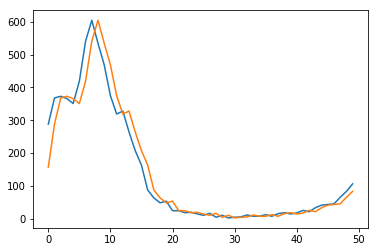

In [129]:
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot


# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [130]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [131]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# transform to supervised learning
X = mydata.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0    0
0    0.0  149
1  149.0  174
2  174.0  239
3  239.0  295
4  295.0  298


In [132]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [133]:
from pandas import read_csv
from pandas import datetime
from pandas import Series

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

print(mydata.head())

# transform to be stationary
differenced = difference(mydata, 1)
print(differenced.head())

# invert transform
inverted = list()
for i in range(len(differenced)):
    value = inverse_difference(mydata, differenced[i], len(mydata)-i)
    inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

Date
2009-10-05    149
2009-10-12    174
2009-10-19    239
2009-10-26    295
2009-11-02    298
Name: Influenza Deaths, dtype: int64
0    25
1    65
2    56
3     3
4   -33
dtype: int64
0    174
1    239
2    295
3    298
4    265
dtype: int64


In [134]:
#Transform Time Series to Scale

In [135]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

print(mydata.head())

# transform scale
X = mydata.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())

# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

Date
2009-10-05    149
2009-10-12    174
2009-10-19    239
2009-10-26    295
2009-11-02    298
Name: Influenza Deaths, dtype: int64
0   -0.726103
1   -0.680147
2   -0.560662
3   -0.457721
4   -0.452206
dtype: float64
0    149.0
1    174.0
2    239.0
3    295.0
4    298.0
dtype: float64


C:\Users\Jason\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [119]:
#LSTM Model Development

In [141]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [143]:
#LSTM Forecast

In [145]:
def forecast(model, batch_size, row):
    X = row[0:-1]
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [185]:
#lstm_model = fit_lstm(train_scaled, 1, 1500, 4)

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

# transform data to be stationary
raw_values = mydata.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-50], supervised_values[-50:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Week=1, Predicted=230.274045, Expected=288.000000
Week=2, Predicted=461.162646, Expected=368.000000
Week=3, Predicted=388.598651, Expected=373.000000
Week=4, Predicted=337.755088, Expected=366.000000
Week=5, Predicted=351.290421, Expected=351.000000
Week=6, Predicted=339.710171, Expected=419.000000
Week=7, Predicted=521.298340, Expected=541.000000
Week=8, Predicted=708.614178, Expected=605.000000
Week=9, Predicted=628.654807, Expected=535.000000
Week=10, Predicted=469.449455, Expected=469.000000
Week=11, Predicted=417.006708, Expected=375.000000
Week=12, Predicted=293.943527, Expected=319.000000
Week=13, Predicted=275.028569, Expected=328.000000
Week=14, Predicted=332.417989, Expected=264.000000
Week=15, Predicted=210.486828, Expected=207.000000
Week=16, Predicted=162.224870, Expected=163.000000
Week=17, Predicted=124.303306, Expected=87.000000
Week=18, Predicted=24.490124, Expected=63.000000
Week=19, Predicted=43.615485, Expected=48.000000
Week=20, Predicted=33.431527, Expected=53.000

Test RMSE: 33.629


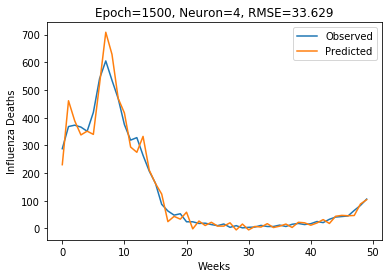

In [187]:
#lstm_model = fit_lstm(train_scaled, 1, 1500, 4) report performance

rmse = sqrt(mean_squared_error(raw_values[-50:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-50:])
pyplot.plot(predictions)
pyplot.title("Epoch=1500, Neuron=4, RMSE=33.629")
pyplot.xlabel("Weeks")
pyplot.ylabel("Influenza Deaths")
pyplot.legend(labels=["Observed", "Predicted"])
pyplot.show()

In [188]:
#lstm_model2 = fit_lstm(train_scaled, 1, 3000, 4)

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

# transform data to be stationary
raw_values = mydata.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-50], supervised_values[-50:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
    
rmse = sqrt(mean_squared_error(raw_values[-50:], predictions))
print('Test RMSE: %.3f' % rmse)

Week=1, Predicted=189.088083, Expected=288.000000
Week=2, Predicted=417.546076, Expected=368.000000
Week=3, Predicted=522.573197, Expected=373.000000
Week=4, Predicted=359.274010, Expected=366.000000
Week=5, Predicted=290.484851, Expected=351.000000
Week=6, Predicted=342.314737, Expected=419.000000
Week=7, Predicted=422.063107, Expected=541.000000
Week=8, Predicted=631.339951, Expected=605.000000
Week=9, Predicted=702.482992, Expected=535.000000
Week=10, Predicted=458.693774, Expected=469.000000
Week=11, Predicted=391.901612, Expected=375.000000
Week=12, Predicted=325.531369, Expected=319.000000
Week=13, Predicted=309.015981, Expected=328.000000
Week=14, Predicted=318.895104, Expected=264.000000
Week=15, Predicted=248.387267, Expected=207.000000
Week=16, Predicted=181.470725, Expected=163.000000
Week=17, Predicted=130.119206, Expected=87.000000
Week=18, Predicted=48.912573, Expected=63.000000
Week=19, Predicted=24.216434, Expected=48.000000
Week=20, Predicted=13.128426, Expected=53.000

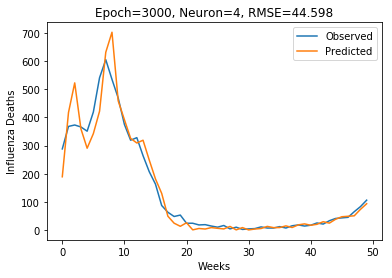

In [189]:
#lstm_model = fit_lstm(train_scaled, 1, 3000, 4) report performance


# line plot of observed vs predicted
pyplot.plot(raw_values[-50:])
pyplot.plot(predictions)
pyplot.title("Epoch=3000, Neuron=4, RMSE=44.598")
pyplot.xlabel("Weeks")
pyplot.ylabel("Influenza Deaths")
pyplot.legend(labels=["Observed", "Predicted"])
pyplot.show()

In [190]:
#lstm_model = fit_lstm(train_scaled, 1, 1500, 2)

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

# transform data to be stationary
raw_values = mydata.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-50], supervised_values[-50:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 2)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-50:], predictions))
print('Test RMSE: %.3f' % rmse)


Week=1, Predicted=205.228875, Expected=288.000000
Week=2, Predicted=392.693796, Expected=368.000000
Week=3, Predicted=417.069452, Expected=373.000000
Week=4, Predicted=367.108836, Expected=366.000000
Week=5, Predicted=361.558113, Expected=351.000000
Week=6, Predicted=339.367212, Expected=419.000000
Week=7, Predicted=480.292774, Expected=541.000000
Week=8, Predicted=633.119073, Expected=605.000000
Week=9, Predicted=640.633541, Expected=535.000000
Week=10, Predicted=467.481141, Expected=469.000000
Week=11, Predicted=427.011965, Expected=375.000000
Week=12, Predicted=303.462524, Expected=319.000000
Week=13, Predicted=286.473258, Expected=328.000000
Week=14, Predicted=343.023313, Expected=264.000000
Week=15, Predicted=206.055331, Expected=207.000000
Week=16, Predicted=170.702221, Expected=163.000000
Week=17, Predicted=133.247315, Expected=87.000000
Week=18, Predicted=28.323473, Expected=63.000000
Week=19, Predicted=55.241189, Expected=48.000000
Week=20, Predicted=37.077513, Expected=53.000

Test RMSE: 31.864


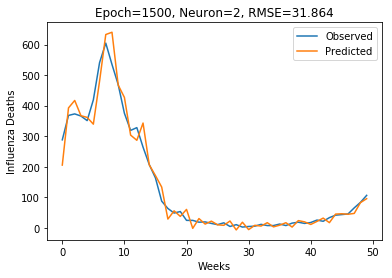

In [191]:
#lstm_model = fit_lstm(train_scaled, 1, 1500, 2) report performance

rmse = sqrt(mean_squared_error(raw_values[-50:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-50:])
pyplot.plot(predictions)
pyplot.title("Epoch=1500, Neuron=2, RMSE=31.864")
pyplot.xlabel("Weeks")
pyplot.ylabel("Influenza Deaths")
pyplot.legend(labels=["Observed", "Predicted"])
pyplot.show()

In [ ]:

#RUN ON FULL DATA SET


In [195]:
#lstm_model = fit_lstm(train_scaled, 1, 3000, 4)

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

# transform data to be stationary
raw_values = mydata.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
####### train, test = supervised_values[0:-50], supervised_values[-50:]
train = supervised_values[0:-1]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 2)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

########## walk-forward validation on the test data
# predictions = list()
# for i in range(len(test_scaled)):
# 	# make one-step forecast
# 	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
# 	yhat = forecast_lstm(lstm_model, 1, X)
# 	# invert scaling
# 	yhat = invert_scale(scaler, X, yhat)
# 	# invert differencing
# 	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
# 	# store forecast
# 	predictions.append(yhat)
# 	expected = raw_values[len(train) + i + 1]
# 	print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))



array([[-0.30162746],
       [-0.3548863 ],
       [-0.21868555],
       [-0.352489  ],
       [-0.34762153],
       [-0.3548863 ],
       [-0.4935095 ],
       [-0.3548863 ],
       [-0.4843558 ],
       [-0.3548863 ],
       [-0.41222835],
       [-0.3548863 ],
       [-0.40113285],
       [-0.3548863 ],
       [-0.3615494 ],
       [-0.3548863 ],
       [-0.3637341 ],
       [-0.3548863 ],
       [-0.34195915],
       [-0.3548863 ],
       [-0.35064986],
       [-0.3548863 ],
       [-0.36152732],
       [-0.3548863 ],
       [-0.37468284],
       [-0.3548863 ],
       [-0.39670715],
       [-0.3548863 ],
       [-0.37468284],
       [-0.3548863 ],
       [-0.3637341 ],
       [-0.3548863 ],
       [-0.36810866],
       [-0.3548863 ],
       [-0.3615494 ],
       [-0.3548863 ],
       [-0.37248975],
       [-0.3548863 ],
       [-0.3637341 ],
       [-0.3548863 ],
       [-0.3615494 ],
       [-0.3548863 ],
       [-0.36592057],
       [-0.3548863 ],
       [-0.35718474],
       [-0